<a href="https://colab.research.google.com/github/Haneen-Alahmadi/Customer-Segmentation/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [2]:
data = pd.read_csv('/content/Mall_Customers.csv')

# 1- Explore Data


In [3]:
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.sample()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
131,132,Male,39,71,75


In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 2- Transform opject data

In [8]:
label = LabelEncoder()

In [9]:
data['Gender'] = label.fit_transform(data['Gender'])

In [10]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


# 3- Create Module

In [11]:
scaler = StandardScaler()

In [12]:
x = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
xdata = scaler.fit_transform(x)

In [13]:
clustern= []
j=[]

In [14]:
for i in range(1,11):
  model = KMeans(n_clusters=i)
  model.fit(xdata)
  clustern.append(i)
  j.append(model.inertia_)

In [15]:
pd.DataFrame({'clustern':clustern,'j':j})

,clustern,j
0,1,600.000000
1,2,389.386189
2,3,296.058100
3,4,205.225147
4,5,168.247580
5,6,134.352775
6,7,125.976027
7,8,103.846238
8,9,107.913618
9,10,90.657720


Text(0, 0.5, 'Percentage of Error')

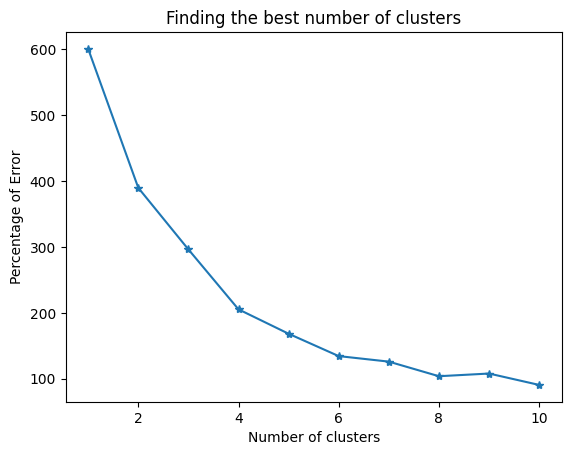

In [16]:
plt.plot(clustern,j,marker='*')
plt.title('Finding the best number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of Error')

In [17]:
# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
data['Cluster'] = kmeans.fit_predict(xdata)


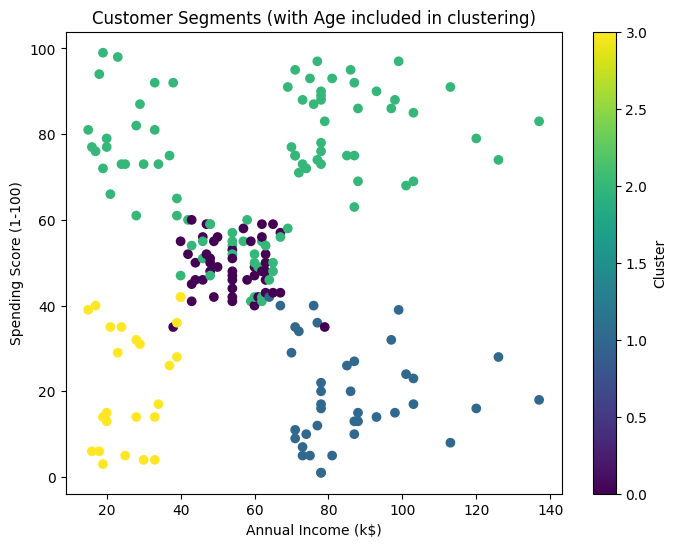

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments (with Age included in clustering)')
plt.colorbar(label='Cluster')
plt.show()



# Data Analysis

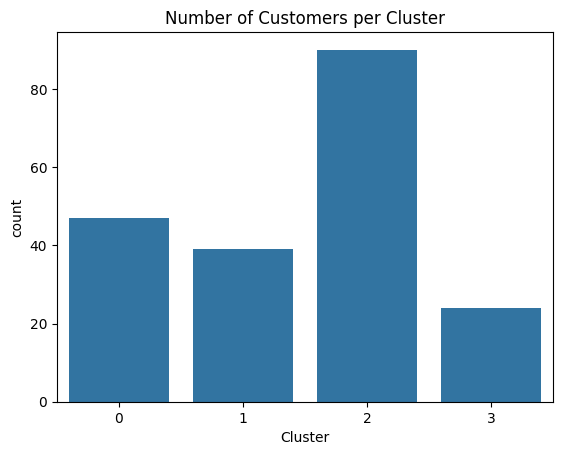

In [23]:
sns.countplot(x=data['Cluster'])
plt.title('Number of Customers per Cluster')
plt.show()

<Axes: ylabel='count'>

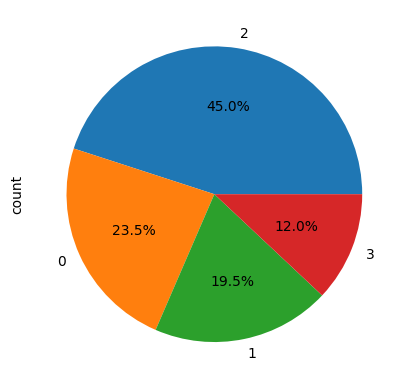

In [27]:
data['Cluster'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: xlabel='Cluster', ylabel='Spending Score (1-100)'>

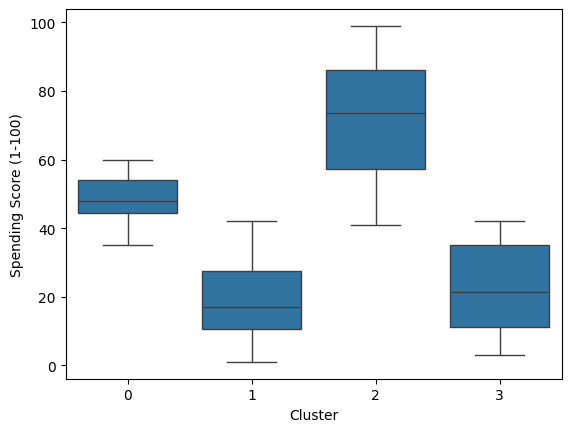

In [32]:
sns.boxplot(x=data.Cluster, y=data['Spending Score (1-100)'])

<Axes: xlabel='Age', ylabel='Count'>

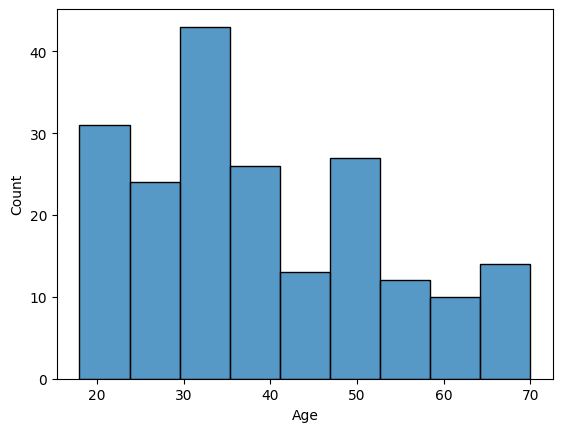

In [33]:
sns.histplot(data['Age'])

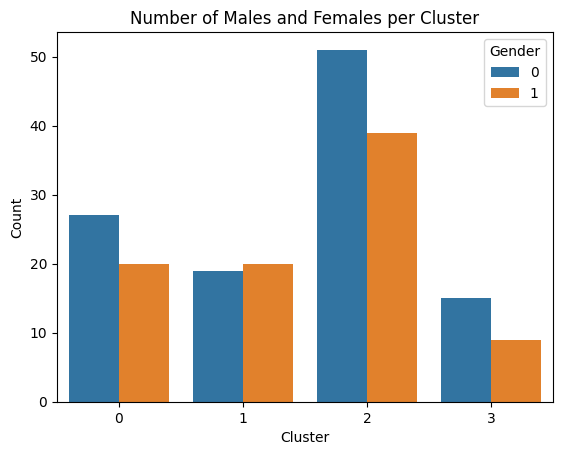

In [39]:
sns.countplot(x=data['Cluster'], hue=data['Gender'])
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Number of Males and Females per Cluster')
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

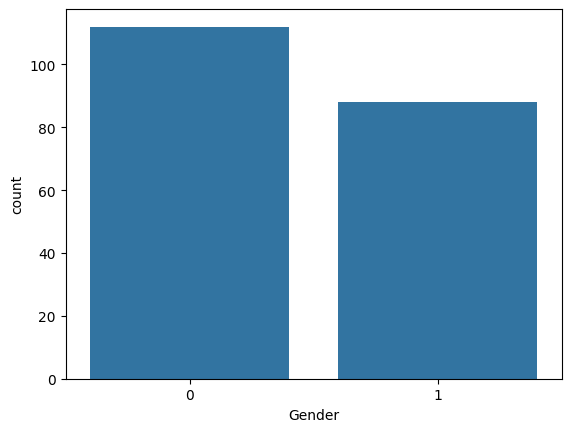

In [40]:
sns.countplot(data=data, x='Gender')